In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Preprocessing

In [6]:
# Remove unwanted columns
df=df.drop(['Name','Cabin','Ticket'],axis=1)

In [7]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [8]:
# Remove null or duplicated values

In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [10]:
df=df.dropna()

In [11]:
df.shape

(712, 9)

In [12]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [13]:
# change the data type of age from float into int
df['Age']=df['Age'].astype(int)

In [14]:
df.duplicated().sum()

np.int64(0)

<Axes: >

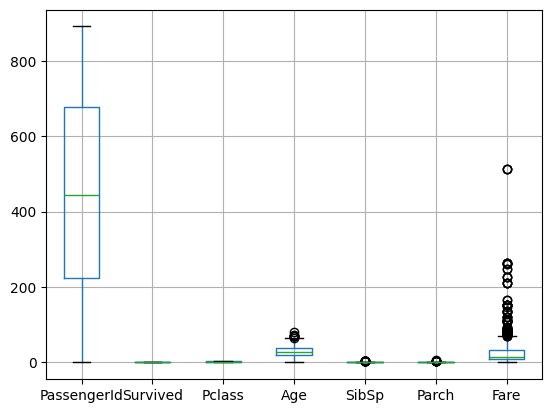

In [15]:
# check the outliers
df.boxplot()

In [16]:
# Handle outliers
import numpy as np

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Sex          712 non-null    object 
 4   Age          712 non-null    int64  
 5   SibSp        712 non-null    int64  
 6   Parch        712 non-null    int64  
 7   Fare         712 non-null    float64
 8   Embarked     712 non-null    object 
dtypes: float64(1), int64(6), object(2)
memory usage: 55.6+ KB


In [1]:
df.boxplot()
plt.show()

NameError: name 'df' is not defined

In [25]:
df.select_dtypes(include='number').skew()

PassengerId   -0.000512
Survived       0.390010
Pclass        -0.475604
Age            0.383645
SibSp          2.515107
Parch          2.614177
Fare           4.667009
Fare_log       0.546960
Parch1         1.507973
Sib_Sp         1.357673
dtype: float64

# EDA (Explotary Data Analysis)

In [26]:
#Find the correlation of numerical values

In [27]:
selected_col = ['Age','Fare','Pclass','SibSp','Parch','Survived']
df_select=df[selected_col]
corr_matrix=df_select.corr()

In [28]:
sns.heatmap(corr_matrix,annot=True, cmap='coolwarm')

<Axes: >

In [29]:
# Count of passengers by Embarked

In [30]:
df1=df['Embarked'].value_counts()

In [31]:
df1

Embarked
S    554
C    130
Q     28
Name: count, dtype: int64

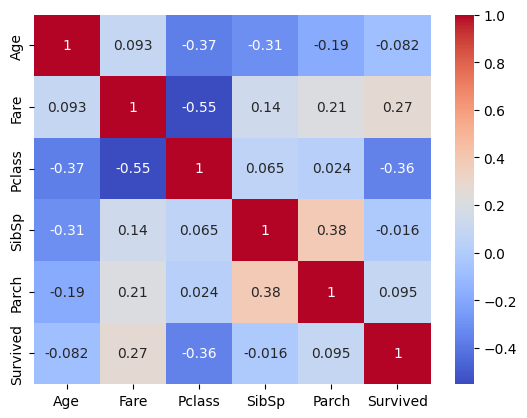

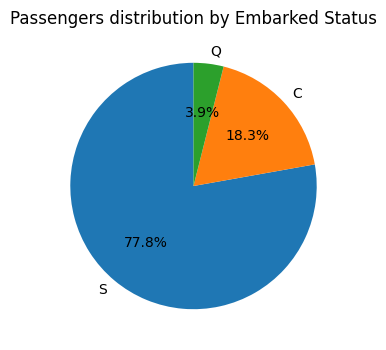

In [32]:
plt.figure(figsize=(5,4))
plt.pie(df1,labels=('S','C','Q'),autopct='%.1f%%',startangle=90)
plt.title('Passengers distribution by Embarked Status')
plt.show()

In [33]:
# Count the passengers by Sex

In [34]:
df2=df['Sex'].value_counts()

In [35]:
df2

Sex
male      453
female    259
Name: count, dtype: int64

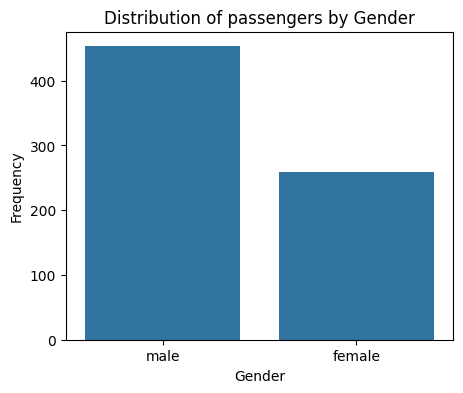

In [36]:
plt.figure(figsize=(5,4))
sns.barplot(df2)
plt.title('Distribution of passengers by Gender')
plt.ylabel('Frequency')
plt.xlabel('Gender')
plt.show()

In [37]:
# Create a new column for fare level  

In [38]:
conditions=[df['Fare']<=20,(df['Fare']>20) & (df['Fare']<=35),(df['Fare']>35) & (df['Fare']<=50),df['Fare']>50]
choices =['Low','Medium','Mid-High','High']

In [39]:
df['fare_level']=np.select(conditions, choices,default='Unknown')

In [40]:
df['fare_level']

0         Low
1        High
2         Low
3        High
4         Low
        ...  
885    Medium
886       Low
887    Medium
889    Medium
890       Low
Name: fare_level, Length: 712, dtype: object

In [41]:
df3=df['fare_level'].value_counts()

In [42]:
df3

fare_level
Low         391
Medium      151
High        136
Mid-High     34
Name: count, dtype: int64

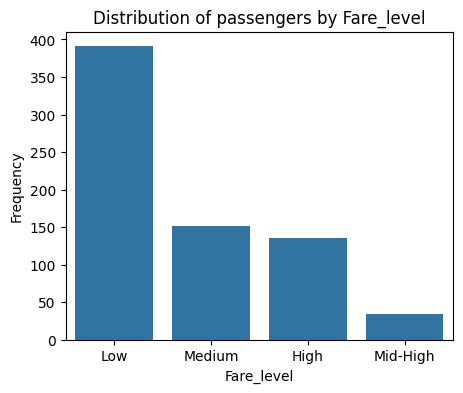

In [43]:
plt.figure(figsize=(5,4))
sns.barplot(df3)
plt.title('Distribution of passengers by Fare_level')
plt.ylabel('Frequency')
plt.xlabel('Fare_level')
plt.show()

In [44]:
# survival rate by fare level

In [45]:
df_rate=df.groupby('fare_level')['Survived'].value_counts().reset_index()
df_rate

,fare_level,Survived,count
0,High,1,96
1,High,0,40
2,Low,0,278
3,Low,1,113
4,Medium,0,85
5,Medium,1,66
6,Mid-High,0,21
7,Mid-High,1,13


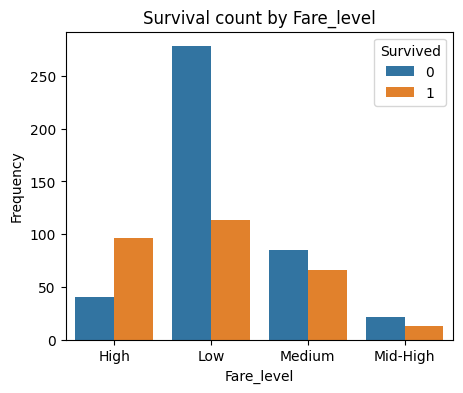

In [46]:
plt.figure(figsize=(5,4))
sns.barplot(data=df_rate,x='fare_level',y='count',hue='Survived')
plt.title('Survival count by Fare_level')
plt.ylabel('Frequency')
plt.xlabel('Fare_level')
plt.show()

In [47]:
# count of people who survived(1) or not (0)

In [48]:
df4=df['Survived'].value_counts()
df4

Survived
0    424
1    288
Name: count, dtype: int64

In [49]:
df5=df.groupby('Sex')['Survived'].value_counts().reset_index()
df5 

,Sex,Survived,count
0,female,1,195
1,female,0,64
2,male,0,360
3,male,1,93


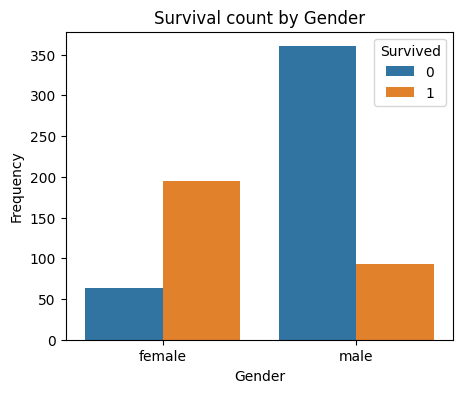

In [50]:
plt.figure(figsize=(5,4))
sns.barplot(data=df5,x='Sex',y='count',hue='Survived')
plt.title('Survival count by Gender')
plt.ylabel('Frequency')
plt.xlabel('Gender')
plt.show()

In [51]:
# counts of survival people by pclass

In [52]:
df6=df['Pclass'].value_counts()
df6

Pclass
3    355
1    184
2    173
Name: count, dtype: int64

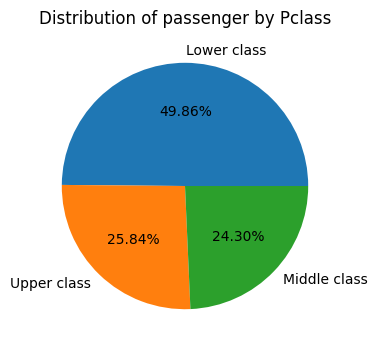

In [53]:
plt.figure(figsize=(5,4))
plt.pie(x=df6,labels=('Lower class','Upper class','Middle class'),autopct='%.2f%%')
plt.title('Distribution of passenger by Pclass')
plt.show()

In [54]:
df7=df.groupby('Pclass')['Survived'].value_counts().reset_index()
df7

,Pclass,Survived,count
0,1,1,120
1,1,0,64
2,2,0,90
3,2,1,83
4,3,0,270
5,3,1,85


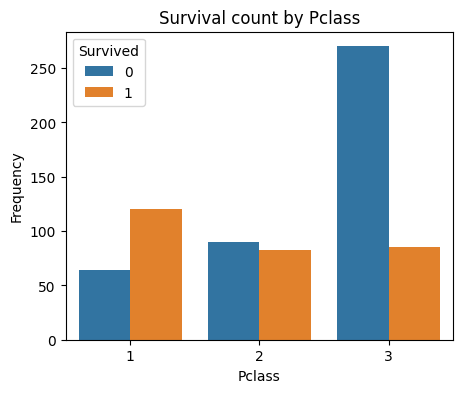

In [55]:
plt.figure(figsize=(5,4))
sns.barplot(data=df7,x='Pclass',y='count',hue='Survived')
plt.title('Survival count by Pclass')
plt.ylabel('Frequency')
plt.xlabel('Pclass')
plt.show()

In [56]:
# Age distribution

In [57]:
df8=df['Age'].value_counts().sort_index().reset_index()
df8

,Age,count
0,0,7
1,1,7
2,2,10
3,3,6
4,4,10
...,...,...
66,66,1
67,70,3
68,71,2
69,74,1


In [58]:
df8.columns=['Age','count']

In [59]:
import plotly.express as px

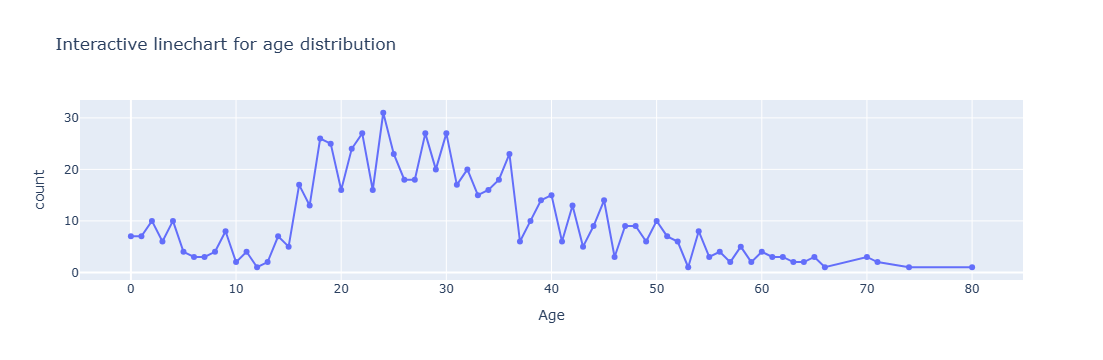

In [60]:
fig=px.line(df8,x='Age',y='count',markers=True,title='Interactive linechart for age distribution')
fig.update_traces(hovertemplate='Age:%{x}<br>count:%{y}')

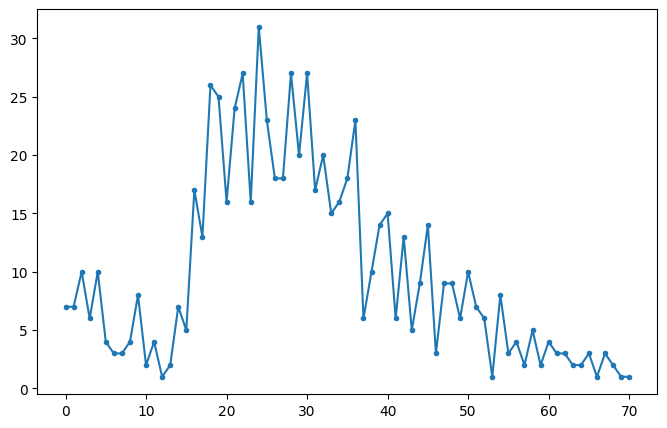

In [61]:
plt.figure(figsize=(8,5))
plt.plot(df8.index,df8['count'],marker='.')
plt.show()

In [62]:
# Age distribution by age level 

In [63]:
def classify_age(age):
    if pd.isnull(age):
        return 'Unknow'
    elif age<=15:
        return 'Child'
    elif age<=30:
        return 'Teenager'
    elif age<=45:
        return 'Adult'
    else:
        return 'Oldage'

In [64]:
df['Age-level']=df['Age'].apply(classify_age)

In [65]:
df9=df['Age-level'].value_counts().reset_index().sort_values(by='count')
df9

,Age-level,count
3,Child,83
2,Oldage,100
1,Adult,201
0,Teenager,328


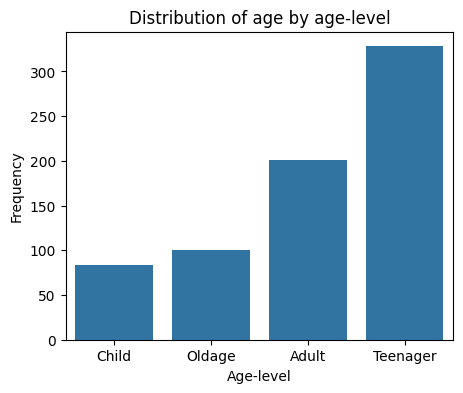

In [66]:
plt.figure(figsize=(5,4))
sns.barplot(data=df9,x='Age-level',y='count')
plt.title('Distribution of age by age-level')
plt.ylabel('Frequency')
plt.xlabel('Age-level')
plt.show()

- Create the family size using sibsp or parch
- sibsp = Sibling/Spouse
  - 0= no sibling
  - 1 = one sibling
  - 2= two siblings or spouse and so on
- Parch = Parents/child
  - 0= no parent/child
  - 1= one parent or child
  - 2= two parents or child and so on

In [67]:
df['family_size']=df['SibSp']+df['Parch']+1
df['family_size']

0      2
1      2
2      1
3      2
4      1
      ..
885    6
886    1
887    1
889    1
890    1
Name: family_size, Length: 712, dtype: int64

In [68]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Fare_log,Parch1,Sib_Sp,fare_level,Age-level,family_size
0,1,0,3,male,22,1,0,7.2500,S,2.110213,0.0,0.693147,Low,Teenager,2
1,2,1,1,female,38,1,0,71.2833,C,4.280593,0.0,0.693147,High,Adult,2
2,3,1,3,female,26,0,0,7.9250,S,2.188856,0.0,0.000000,Low,Teenager,1
3,4,1,1,female,35,1,0,53.1000,S,3.990834,0.0,0.693147,High,Adult,2
4,5,0,3,male,35,0,0,8.0500,S,2.202765,0.0,0.000000,Low,Adult,1


In [69]:
df_size=df['family_size'].value_counts().reset_index()
df_size

,family_size,count
0,1,402
1,2,139
2,3,93
3,4,27
4,6,22
5,7,12
6,5,11
7,8,6


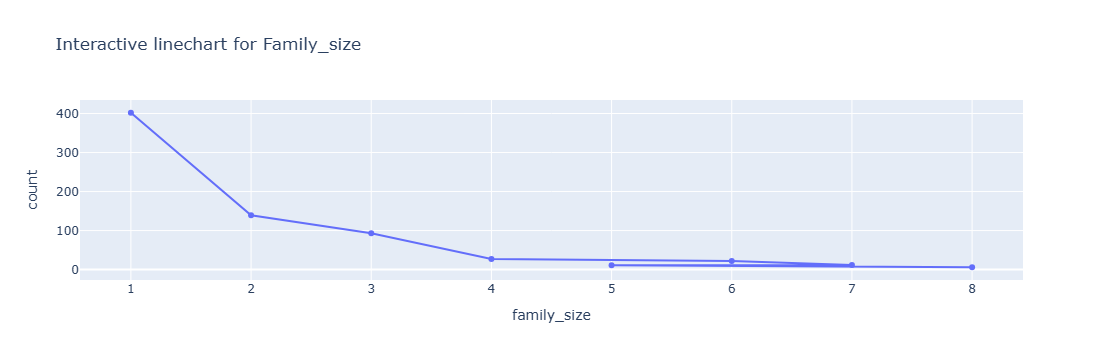

In [70]:
fig=px.line(df_size,x='family_size',y='count',markers=True,title='Interactive linechart for Family_size')
fig.update_traces(hovertemplate='family_size:%{x}<br>count:%{y}')

In [71]:
# survival rate by age-level

In [72]:
dff=df.groupby('Age-level')['Survived'].value_counts().reset_index()
dff

,Age-level,Survived,count
0,Adult,0,116
1,Adult,1,85
2,Child,1,49
3,Child,0,34
4,Oldage,0,63
5,Oldage,1,37
6,Teenager,0,211
7,Teenager,1,117


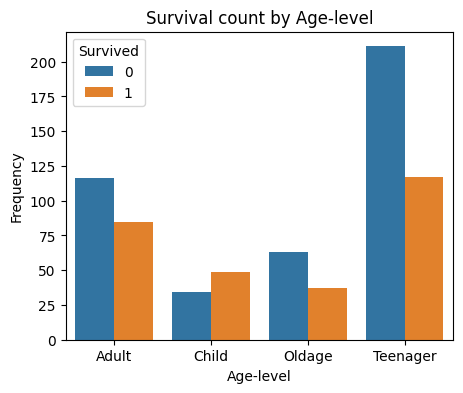

In [73]:
plt.figure(figsize=(5,4))
sns.barplot(data=dff,x='Age-level',y='count',hue='Survived')
plt.title('Survival count by Age-level')
plt.ylabel('Frequency')
plt.xlabel('Age-level')
plt.show()

In [74]:
# Count of gender by embarked

In [75]:
df10=df.groupby('Embarked')['Sex'].value_counts().reset_index()
df10

,Embarked,Sex,count
0,C,male,69
1,C,female,61
2,Q,male,16
3,Q,female,12
4,S,male,368
5,S,female,186


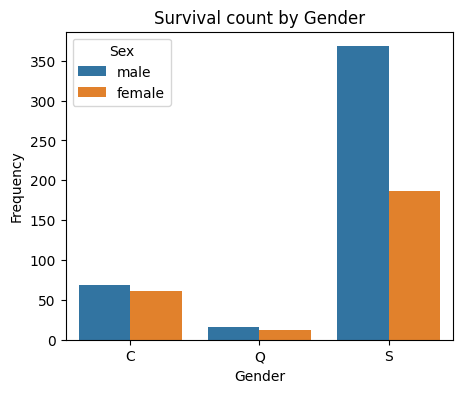

In [76]:
plt.figure(figsize=(5,4))
sns.barplot(data=df10,x='Embarked',y='count',hue='Sex')
plt.title('Survival count by Gender')
plt.ylabel('Frequency')
plt.xlabel('Gender')
plt.show()

# Insights

- The number of males is more than the number of females on the ship.
- Most people have a low fare level
- The survival rate of females is higher than that of males.
- Females survived the most.
- The survival rate of Pclass 1 (Upper class) is higher, and most people died from the Pclass 3 (lower class)
- Teenagers represent the age group with the highest number of passengers and also have the lowest survival rate.
- The age group from 20 to 30 is most represented on the ship.
- Most people embarked from S.
- Most of the people travel single.
- Those who pay low fares have the lowest survival rate.
- These insights are saying that the rich people who are travelling in the upper class or paying the high fare have a high survival rate.

# Predicting the Survival rate

In [19]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22,1,0,7.2500,S
1,2,1,1,female,38,1,0,71.2833,C
2,3,1,3,female,26,0,0,7.9250,S
3,4,1,1,female,35,1,0,53.1000,S
4,5,0,3,male,35,0,0,8.0500,S


In [21]:
#import important libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report

In [22]:
#Encode the categorical values
le=LabelEncoder()

In [23]:
df['Sex']=le.fit_transform(df['Sex'])
df['Embarked']=le.fit_transform(df['Embarked'])

In [65]:
df['Embarked'] #s=2,c=0,Q=1

0      2
1      0
2      2
3      2
4      2
      ..
885    1
886    2
887    2
889    0
890    1
Name: Embarked, Length: 712, dtype: int64

In [54]:
df['Sex']

0      1
1      0
2      0
3      0
4      1
      ..
885    0
886    1
887    0
889    1
890    1
Name: Sex, Length: 712, dtype: int64

In [24]:
# Selection Feature
x=df[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]

In [25]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22,1,0,7.2500,2
1,1,0,38,1,0,71.2833,0
2,3,0,26,0,0,7.9250,2
3,1,0,35,1,0,53.1000,2
4,3,1,35,0,0,8.0500,2
...,...,...,...,...,...,...,...
885,3,0,39,0,5,29.1250,1
886,2,1,27,0,0,13.0000,2
887,1,0,19,0,0,30.0000,2
889,1,1,26,0,0,30.0000,0


In [26]:
y=df['Survived']

In [27]:
y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 712, dtype: int64

In [30]:
# spliting into train test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [31]:
model=RandomForestClassifier()

In [32]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [33]:
y_pre=model.predict(x_test)

In [34]:
y_pre

array([1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1])

In [35]:
print('Accuracy:',accuracy_score(y_pre,y_test))

Accuracy: 0.7762237762237763


In [37]:
print("classification_report:",classification_report(y_test,y_pre))

classification_report:               precision    recall  f1-score   support

           0       0.79      0.82      0.80        80
           1       0.76      0.71      0.74        63

    accuracy                           0.78       143
   macro avg       0.77      0.77      0.77       143
weighted avg       0.78      0.78      0.78       143



In [38]:
from sklearn.metrics import confusion_matrix

In [39]:
cm=confusion_matrix(y_pre,y_test)

In [40]:
cm

array([[66, 18],
       [14, 45]])

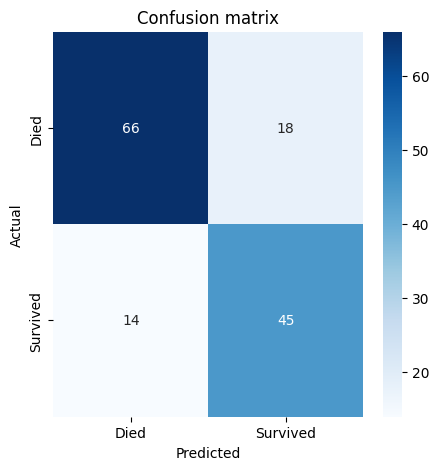

In [51]:
plt.figure(figsize=(5,5))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=['Died','Survived'],yticklabels=['Died','Survived'])
plt.xlabel("Predicted")
plt.ylabel('Actual')
plt.title("Confusion matrix")
plt.show()

In [62]:
def predict_survival(pclass,Sex,Age,SibSp,Parch,Fare,Embarked):
    input_data=pd.DataFrame([{
        'Pclass':pclass,
    'Sex':Sex,
    'Age':Age,
    'SibSp':SibSp,
    'Parch':Parch,
    'Fare':Fare,
    'Embarked':Embarked
    }])
    predcition=model.predict(input_data)
    return predcition[0]

In [63]:
result=predict_survival(1,1,25,0,0,85.25,2)

In [64]:
print("Predicted survival : ",result)

Predicted survival :  0


# It is showing that the passenger who has the following details is likely to died.
- Pclass =1 (upperclass)
- sex=male
- age=25
- SibSp=0
- parch=0
- fare=85.25
- embarked=2(s)

In [66]:
result1=predict_survival(3,0,25,0,0,85.25,2)

In [67]:
print("Predicted survival : ",result1)

Predicted survival :  0


In [68]:
result2=predict_survival(1,0,45,1,0,70,0)

In [69]:
print("Predicted survival : ",result2)

Predicted survival :  1
